In [129]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Basic

In [130]:
pd.Series(['Hello', 'World', 'Greeting', '你好', 2019])

0       Hello
1       World
2    Greeting
3          你好
4        2019
dtype: object

## DataFrame Sample 1

In [131]:
weekdays = pd.date_range(datetime.date.today(), periods = 7)
weekdays

DatetimeIndex(['2024-04-07', '2024-04-08', '2024-04-09', '2024-04-10',
               '2024-04-11', '2024-04-12', '2024-04-13'],
              dtype='datetime64[ns]', freq='D')

In [132]:
# dir(np.random)

w1 = pd.DataFrame(np.random.randint(1, 100, size=(7,3)), index=weekdays, columns=['张老板', '黄老板', '林老板'])
w1

,张老板,黄老板,林老板
2024-04-07,72,97,61
2024-04-08,85,84,83
2024-04-09,4,55,38
2024-04-10,28,12,34
2024-04-11,16,51,59
2024-04-12,6,60,42
2024-04-13,31,74,82


In [133]:
print('Date to String by isoformat(): {0}'.format(datetime.date.today().isoformat()))
print('Date to String by str(): {0}'.format(str(datetime.date.today()+datetime.timedelta(days=4))))

w1[datetime.date.today().isoformat():str(datetime.date.today()+datetime.timedelta(days=4))]

Date to String by isoformat(): 2024-04-07
Date to String by str(): 2024-04-11


,张老板,黄老板,林老板
2024-04-07,72,97,61
2024-04-08,85,84,83
2024-04-09,4,55,38
2024-04-10,28,12,34
2024-04-11,16,51,59


In [134]:
w1.mean()

张老板    34.571429
黄老板    61.857143
林老板    57.000000
dtype: float64

In [135]:
w1.mean(1)

2024-04-07    76.666667
2024-04-08    84.000000
2024-04-09    32.333333
2024-04-10    24.666667
2024-04-11    42.000000
2024-04-12    36.000000
2024-04-13    62.333333
Freq: D, dtype: float64

In [136]:
w1.apply(lambda x: (x.max() + x.min())/2 )

张老板    44.5
黄老板    54.5
林老板    58.5
dtype: float64

In [137]:
pd.concat([w1[0:1],  w1[3:5]])

,张老板,黄老板,林老板
2024-04-07,72,97,61
2024-04-10,28,12,34
2024-04-11,16,51,59


## DataFrame Sample 2

In [138]:
mydf = pd.DataFrame(
    {
        'UID': ['44024583443', '44024543422', '44024598721'],
        '名称': ['波音飞机', '红双喜', 'HM汽车'],
        '销量': [181, 2214, 1235],
        '统计日期': [datetime.datetime.now(), datetime.datetime.now(), datetime.datetime.now()]
    }
)
mydf

,UID,名称,销量,统计日期
0,44024583443,波音飞机,181,2024-04-07 19:14:07.351340
1,44024543422,红双喜,2214,2024-04-07 19:14:07.351352
2,44024598721,HM汽车,1235,2024-04-07 19:14:07.351355


In [139]:
mydf['名称']

0    波音飞机
1     红双喜
2    HM汽车
Name: 名称, dtype: object

In [140]:
mydf.iloc[1]

UID                    44024543422
名称                             红双喜
销量                            2214
统计日期    2024-04-07 19:14:07.351352
Name: 1, dtype: object

In [141]:
mydf.iloc[1:3, [3,1,2]]

,统计日期,名称,销量
1,2024-04-07 19:14:07.351352,红双喜,2214
2,2024-04-07 19:14:07.351355,HM汽车,1235


In [142]:
mydf[mydf.销量<1000]

,UID,名称,销量,统计日期
0,44024583443,波音飞机,181,2024-04-07 19:14:07.351340


In [143]:
mydf.T

,0,1,2
UID,44024583443,44024543422,44024598721
名称,波音飞机,红双喜,HM汽车
销量,181,2214,1235
统计日期,2024-04-07 19:14:07.351340,2024-04-07 19:14:07.351352,2024-04-07 19:14:07.351355


In [144]:
mydf2 = mydf.copy()
mydf2['价格'] = [ 1299, 98.5, 308 ]
mydf2['库存情况'] = [ '充足', '紧张', '缺货' ]
mydf2

,UID,名称,销量,统计日期,价格,库存情况
0,44024583443,波音飞机,181,2024-04-07 19:14:07.351340,1299.0,充足
1,44024543422,红双喜,2214,2024-04-07 19:14:07.351352,98.5,紧张
2,44024598721,HM汽车,1235,2024-04-07 19:14:07.351355,308.0,缺货


In [145]:
mydf2[mydf2['库存情况'].isin(['紧张', '缺货'])]

,UID,名称,销量,统计日期,价格,库存情况
1,44024543422,红双喜,2214,2024-04-07 19:14:07.351352,98.5,紧张
2,44024598721,HM汽车,1235,2024-04-07 19:14:07.351355,308.0,缺货


In [146]:
mydf3 = pd.DataFrame(
    {
        'UID': ['44024543422', '44024583443', '44024598721'],
        '制造商': ['中华烟草', '波音公司', '广汽集团'],
    }
)
mydf3

,UID,制造商
0,44024543422,中华烟草
1,44024583443,波音公司
2,44024598721,广汽集团


In [147]:
# DataFrame Merge
pd.merge(mydf2, mydf3, on='UID')

,UID,名称,销量,统计日期,价格,库存情况,制造商
0,44024583443,波音飞机,181,2024-04-07 19:14:07.351340,1299.0,充足,波音公司
1,44024543422,红双喜,2214,2024-04-07 19:14:07.351352,98.5,紧张,中华烟草
2,44024598721,HM汽车,1235,2024-04-07 19:14:07.351355,308.0,缺货,广汽集团


In [148]:
mydf4 = pd.DataFrame(
    {
        'UID': ['44025583111'],
        '名称': ['AKM突击步枪'],
        '销量': [3200],
        '统计日期': [datetime.datetime.now()]
    }
)
mydf4

,UID,名称,销量,统计日期
0,44025583111,AKM突击步枪,3200,2024-04-07 19:14:08.795420


In [149]:
# 'append' method of DataFrame object substituted by 'concat' method of Pandas object as of v2.0
mydf24 = pd.concat([mydf2, mydf4])

uid = mydf24[mydf24.UID == '44025583111'].index.values[0]

mydf24.at[uid, '价格'] = 279.18
mydf24.at[uid, '库存情况'] = '充足'
mydf24

,UID,名称,销量,统计日期,价格,库存情况
0,44024583443,波音飞机,181,2024-04-07 19:14:07.351340,279.18,充足
1,44024543422,红双喜,2214,2024-04-07 19:14:07.351352,98.50,紧张
2,44024598721,HM汽车,1235,2024-04-07 19:14:07.351355,308.00,缺货
0,44025583111,AKM突击步枪,3200,2024-04-07 19:14:08.795420,279.18,充足


In [150]:
mydf25 = mydf24.copy()
mydf25.at[0, '名称'] = '红双喜'
# mydf25.at[1,'库存情况'] = '充足'
mydf25.at[2, '名称'] = 'AKM突击步枪'
mydf25

,UID,名称,销量,统计日期,价格,库存情况
0,44024583443,红双喜,181,2024-04-07 19:14:07.351340,279.18,充足
1,44024543422,红双喜,2214,2024-04-07 19:14:07.351352,98.50,紧张
2,44024598721,AKM突击步枪,1235,2024-04-07 19:14:07.351355,308.00,缺货
0,44025583111,红双喜,3200,2024-04-07 19:14:08.795420,279.18,充足


In [151]:
mydf25.drop(columns=['UID','统计日期','价格']).groupby(['名称', '库存情况']).sum()

销量
名称      库存情况      
AKM突击步枪 缺货    1235
红双喜     充足    3381
        紧张    2214

In [152]:
pd.pivot_table(mydf25, values='销量', index=['名称'], columns=['库存情况']).fillna(0)

库存情况,充足,紧张,缺货
名称,,,
AKM突击步枪,0.0,0.0,1235.0
红双喜,1690.5,2214.0,0.0


## DataFrame Sample 3

In [153]:
sh1 = pd.DataFrame(
    {
        '学号': ['1082', '1083', '1084', '1085', '1086', '1087'],
        '姓名': ['小王', '小李', '小黄', '小张', '小孔', '小叶'],
        '评分': ['a', 'c', 'e', 'b', 'c', 'a']
    }
)
sh1

,学号,姓名,评分
0,1082,小王,a
1,1083,小李,c
2,1084,小黄,e
3,1085,小张,b
4,1086,小孔,c
5,1087,小叶,a


In [154]:
sh1['评级'] = sh1['评分'].astype('category')
sh1['评级'].cat.categories

Index(['a', 'b', 'c', 'e'], dtype='object')

In [155]:
graded_sh1 = sh1['评级'].cat.rename_categories(['非常好','好','一般','非常差'])
graded_sh1

0    非常好
1     一般
2    非常差
3      好
4     一般
5    非常好
Name: 评级, dtype: category
Categories (4, object): ['非常好', '好', '一般', '非常差']

In [156]:
sh1['评级'] = graded_sh1
sh1.sort_values(by = ['评级', '姓名'])

,学号,姓名,评分,评级
5,1087,小叶,a,非常好
0,1082,小王,a,非常好
3,1085,小张,b,好
4,1086,小孔,c,一般
1,1083,小李,c,一般
2,1084,小黄,e,非常差


In [157]:
sh1.groupby('评级', observed=True).size()

评级
非常好    2
好      1
一般     2
非常差    1
dtype: int64

## Diagram / Chart / Plot / Table

<Axes: >

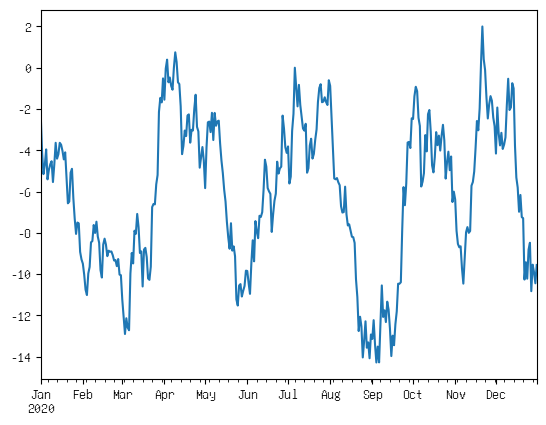

In [158]:
# the year of random datas.
year = 2020

d1 = datetime.date(year,1,1)
d2 = datetime.date(year+1,1,1)
dd = d2 - d1

ts = pd.Series(np.random.randn(
    dd.days), index=pd.date_range(d1, periods=dd.days))
ts = ts.cumsum()
ts.plot()

### Fix Chinese Display Issue

In [159]:
# Fix Chinese unrecognized issue
plt.rcParams['font.sans-serif']=['unifont']  # For Deepin linux 
## plt.rcParams['font.sans-serif']=['Microsoft Yahei']  # For windows 
plt.rcParams['axes.unicode_minus']=False # Fix Minus Sign unrecognized issue

<Axes: >

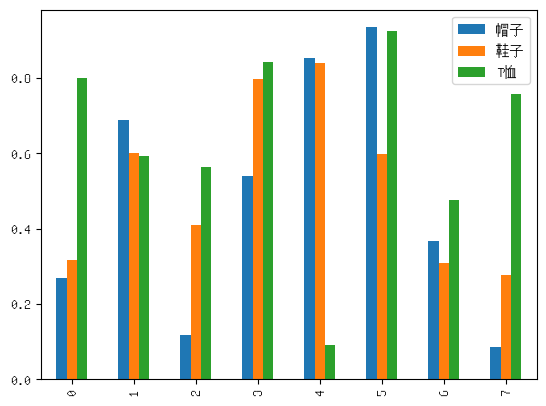

In [160]:
df2 = pd.DataFrame(np.random.rand(8, 3), columns=['帽子', '鞋子', 'T恤'])
df2.plot.bar()

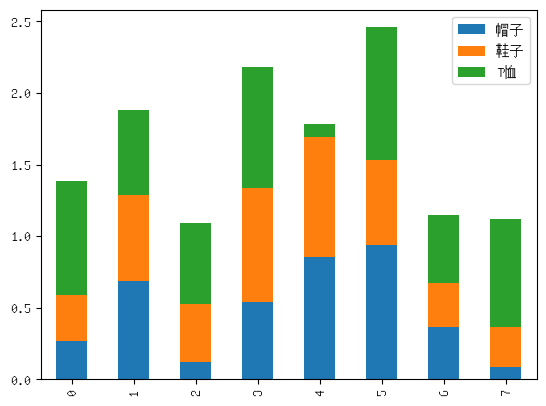

In [161]:
df2.plot.bar(stacked=True);

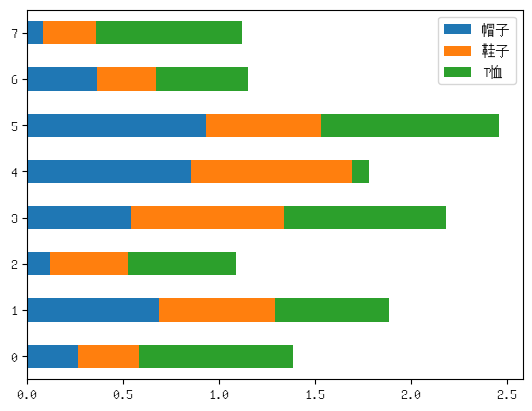

In [162]:
df2.plot.barh(stacked=True);

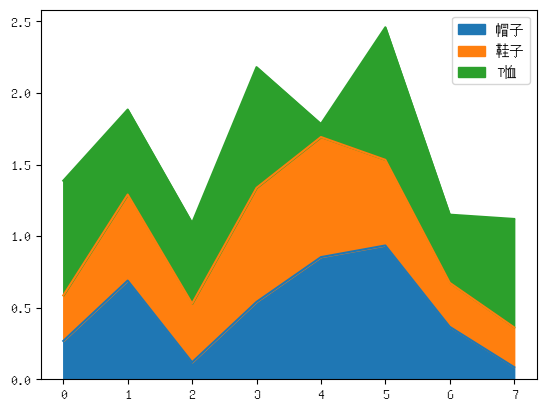

In [163]:
df2.plot.area();

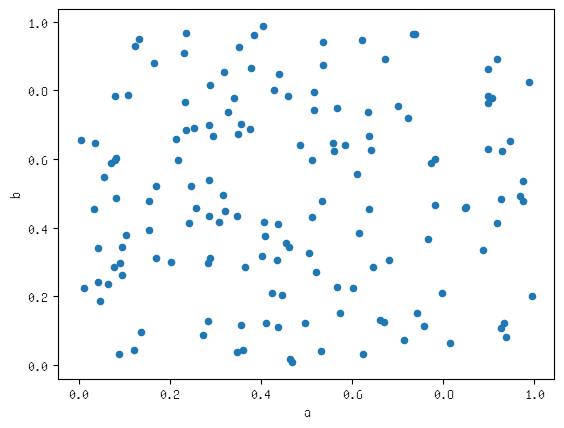

In [164]:
df = pd.DataFrame(np.random.rand(150, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');

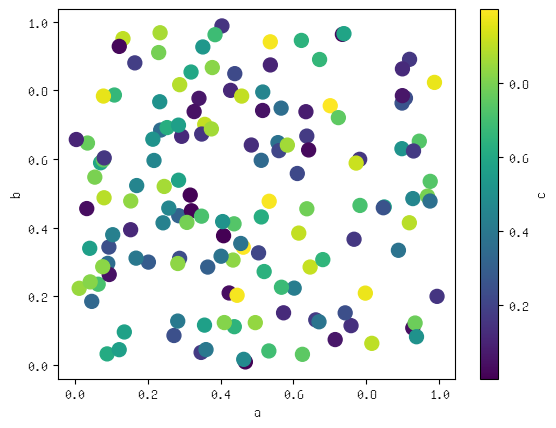

In [165]:
df.plot.scatter(x='a', y='b', c='c', s=100);

<Axes: ylabel='series'>

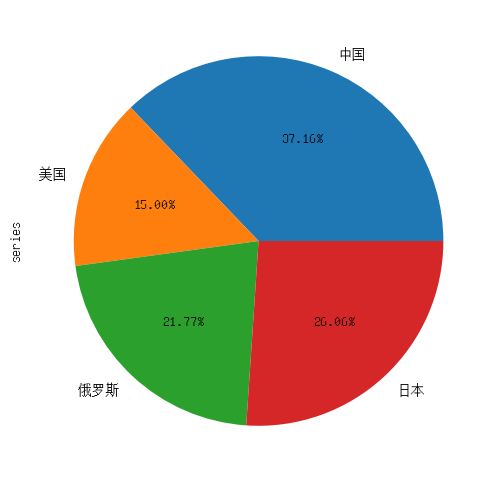

In [166]:
series = pd.Series(3 * np.random.rand(4),index=['中国', '美国', '俄罗斯', '日本'], name='series')
series.plot.pie(figsize=(6, 6), autopct='%.2f%%')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

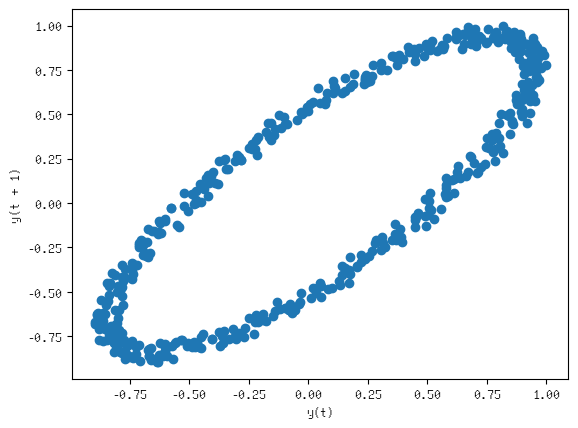

In [167]:
from pandas.plotting import lag_plot
plt.figure()
spacing = np.linspace(-50 * np.pi, 50 * np.pi, num=500)
data = pd.Series(0.1 * np.random.rand(500) + 0.9 * np.sin(spacing))
lag_plot(data)

## Read CSV FIle

In [168]:
csv = pd.read_csv("sample.csv")

#csv.sort_index(axis=0, ascending=False)
csv.sort_values('单价', ascending=False)

,型号,数量,单价
8,HM0729-2736,5,22.99
13,HM0722-136,1,21.99
12,HM0706-2741,2,20.99
11,HM0701-841,7,19.99
10,HM0701-839,1,18.99
0,HM0722-240,4,17.99
14,HM0722-137,1,17.99
9,HM0701-2542,1,17.99
3,HM0723-3236,2,17.99
5,HM0725-2739,3,16.99


In [169]:
csv.columns

Index(['型号', '数量', '单价'], dtype='object')

In [170]:
for v in csv['型号'].values[:-1]:
    print(v, end=', ')
print(csv['型号'].values[-1])

HM0722-240, HM0722-3436, HM0722-3437, HM0723-3236, HM0724-1040, HM0725-2739, HM0727-140, HM0727-241, HM0729-2736, HM0701-2542, HM0701-839, HM0701-841, HM0706-2741, HM0722-136, HM0722-137, HM0722-138, HM0722-139, HM0722-237


In [171]:
csv.to_numpy()

array([['HM0722-240', 4, 17.99],
       ['HM0722-3436', 1, 13.99],
       ['HM0722-3437', 1, 12.99],
       ['HM0723-3236', 2, 17.99],
       ['HM0724-1040', 1, 15.49],
       ['HM0725-2739', 3, 16.99],
       ['HM0727-140', 5, 13.99],
       ['HM0727-241', 1, 12.99],
       ['HM0729-2736', 5, 22.99],
       ['HM0701-2542', 1, 17.99],
       ['HM0701-839', 1, 18.99],
       ['HM0701-841', 7, 19.99],
       ['HM0706-2741', 2, 20.99],
       ['HM0722-136', 1, 21.99],
       ['HM0722-137', 1, 17.99],
       ['HM0722-138', 2, 15.49],
       ['HM0722-139', 6, 16.99],
       ['HM0722-237', 3, 13.99]], dtype=object)

In [172]:
csv.describe()
#csv.describe().mean()

,数量,单价
count,18.000000,18.000000
mean,2.611111,17.212222
std,1.974511,3.035197
min,1.000000,12.990000
25%,1.000000,14.365000
50%,2.000000,17.490000
75%,3.750000,18.740000
max,7.000000,22.990000


In [173]:
csv.head(5)

,型号,数量,单价
0,HM0722-240,4,17.99
1,HM0722-3436,1,13.99
2,HM0722-3437,1,12.99
3,HM0723-3236,2,17.99
4,HM0724-1040,1,15.49


In [174]:
csv[3:6]

,型号,数量,单价
3,HM0723-3236,2,17.99
4,HM0724-1040,1,15.49
5,HM0725-2739,3,16.99


In [175]:
csv.tail(3)

,型号,数量,单价
15,HM0722-138,2,15.49
16,HM0722-139,6,16.99
17,HM0722-237,3,13.99


In [176]:
csv['单价'].value_counts()

单价
17.99    4
13.99    3
12.99    2
15.49    2
16.99    2
22.99    1
18.99    1
19.99    1
20.99    1
21.99    1
Name: count, dtype: int64

## Display Diagram With 'matplotlib'

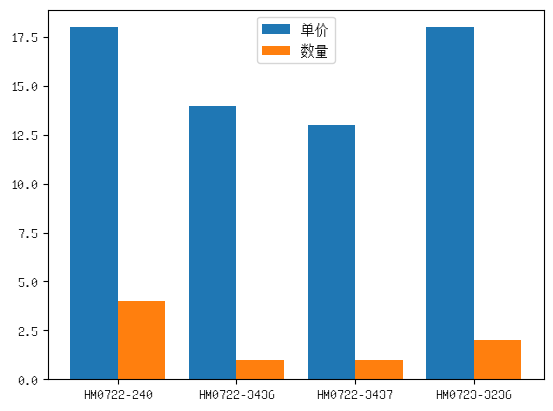

In [177]:
#print(csv.型号.values)
#print(csv.单价.values)

display_num = 4

x = csv.型号.values[0:display_num]
y1 = csv.单价.values[0:display_num]
y2 = csv.数量.values[0:display_num]

ind = np.arange(len(x))
width = 0.4
fig, ax = plt.subplots()

ax.bar(ind-width/2, y1, width, label="单价")
ax.bar(ind+width/2, y2, width, label="数量")
ax.set_xticks(ind)
ax.set_xticklabels(x)

#ax.plot(x, y1, label="单价")
#ax.plot(x, y2, label="数量")

ax.legend()

plt.show()

## Read XLSX FIle

In [178]:
# Install module 'xlrd' before read excel file.
#
#   %pip install xlrd
#

In [179]:
xlsx = pd.read_excel('sample.xlsx', 'Sheet2', index_col=[0], na_values=['NA'])
xlsx

,QUANTITY
REASON,
ORDERED_WRONG_ITEM,5
APPAREL_TOO_SMALL,74
APPAREL_STYLE,33
UNWANTED_ITEM,12
MISORDERED,8
APPAREL_TOO_LARGE,33
UNDELIVERABLE_UNKNOWN,2
NOT_AS_DESCRIBED,5
NO_REASON_GIVEN,6


<Axes: ylabel='REASON'>

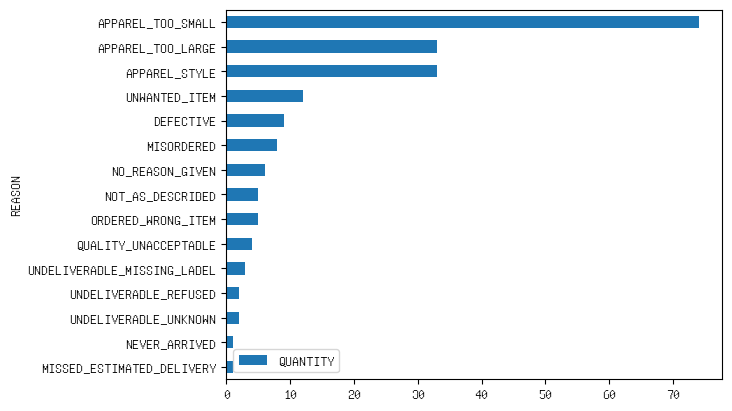

In [180]:
xlsx.sort_values(by='QUANTITY', ascending=True).plot.barh()